In [1]:
%load_ext autoreload
%autoreload 2

INFO:SparkMonitorKernel:SparkMonitor comm opened from frontend.


In [2]:
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import math
import ROOT
from copy import deepcopy
from uproot3_methods import TLorentzVectorArray
from bbtautau_helpers import Selection, BranchCut, CompositeCut, eff_sens_plots, higg4d2_selection, efficiency_plot
from presel_samples import sig10_sample, sig16_sample, sig20_sample, ttbar_sample, zhf_sample, signal_samples, background_samples, all_samples
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

Welcome to JupyROOT 6.26/08


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward0/persist.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  {"minsize": 8192, "types": [numpy.bool_, numpy.bool, numpy.integer

In [3]:
rel_samples = [sig10_sample, sig16_sample, sig20_sample, ttbar_sample, zhf_sample]

/eos/home-i00/n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-i00/n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-i00/n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:746: RuntimeWarning: invalid value encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-i00/n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)


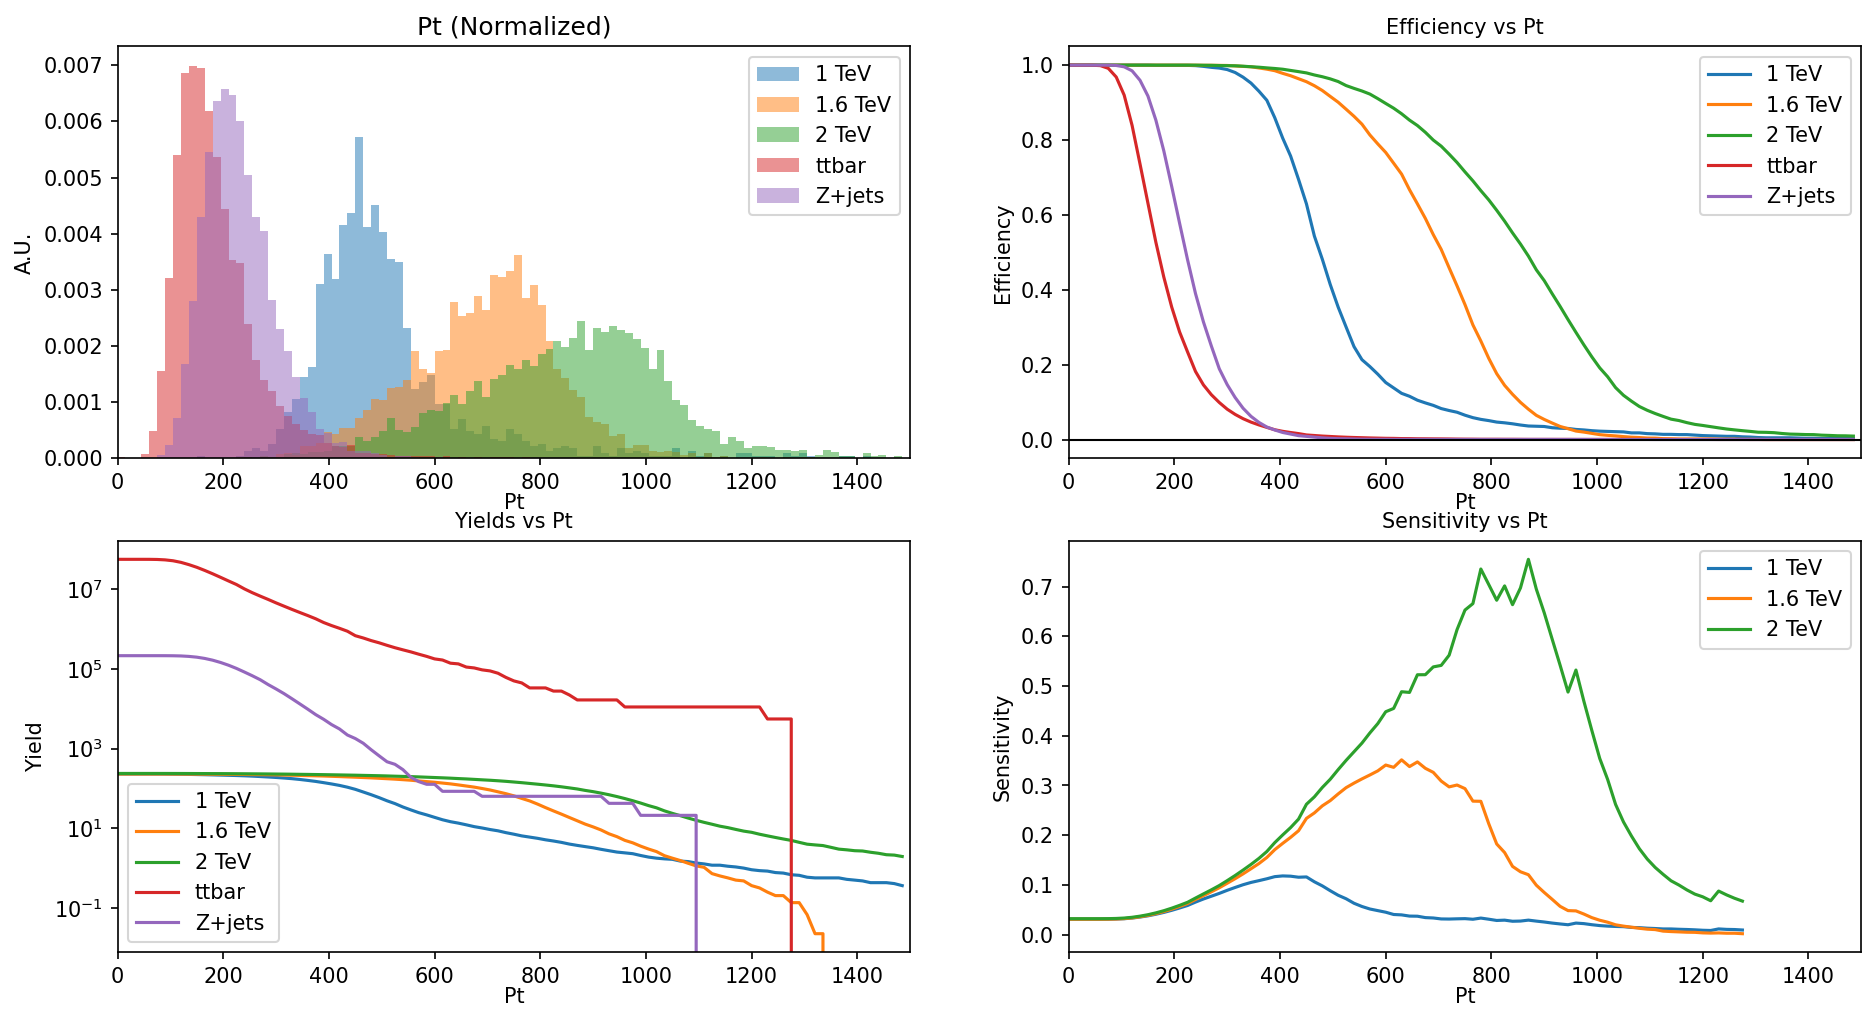

In [4]:
eff_sens_plots(all_samples, 'LeadingLargeRJetPt', 0, 1500, 100, 'All')

In [6]:
selection = Selection()
selection.set_cut('LeadingLargeRJetPt', 350, 'min')
selection.set_cut('NIDLepton', 1, 'min')
for sample in all_samples:
    print(sample.short_name)
    if sample.is_signal:
        print(selection.cuts_eff(sample.fid_branches))
    print(selection.cuts_eff(sample.branches))

1 TeV
0.9199475065616798
0.6766
1.6 TeV
0.9564125969876769
0.8658
2 TeV
0.9475849731663685
0.8862
ttbar
0.0374
Z+jets
0.0342


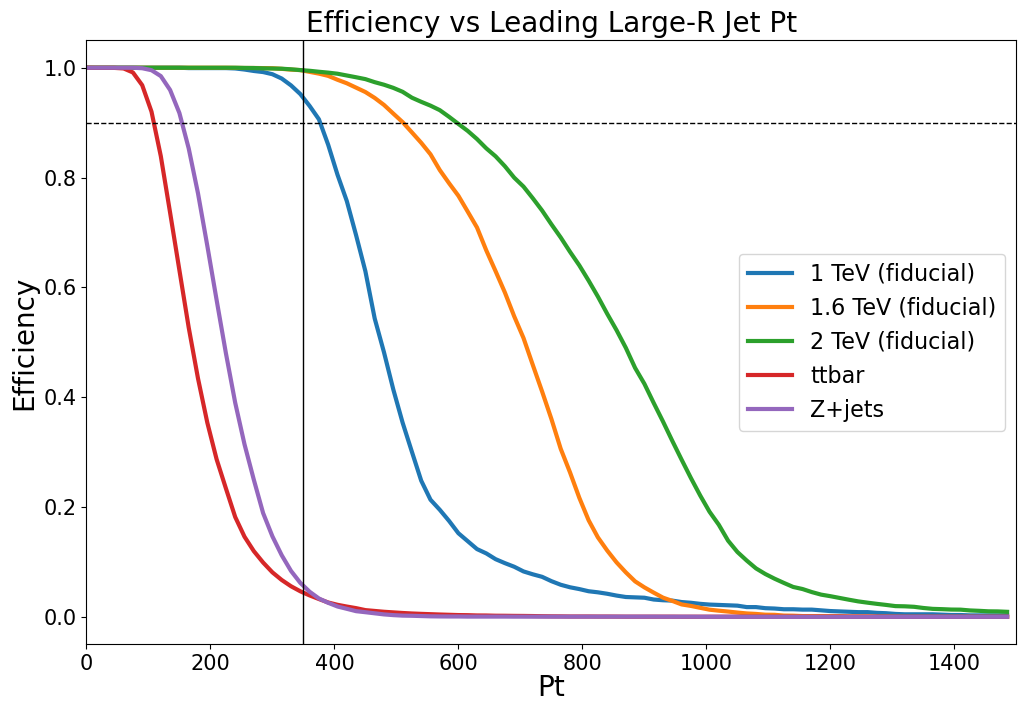

In [14]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
efficiency_plot(all_samples, 'LeadingLargeRJetPt', 0, 1500, 100)

In [4]:
for sample in all_samples:
    print(sample)
    if sample.is_signal:
        sample.fid_branches['NIDLepton'] = sample.fid_branches['NEleLoose'] + sample.fid_branches['NMuTight']
    sample.branches['NIDLepton'] = sample.branches['NEleLoose'] + sample.branches['NMuTight']

Sample: 1 TeV
Sourced from: ../samples/450522_X1000_bbtautau_lephad.ntuple.root
Events: 10000
Source events: 10000
MC weight: 0.023053113859999995

Sample: 1.6 TeV
Sourced from: ../samples/450166_X1600_bbtautau_lephad.ntuple.root
Events: 10000
Source events: 10000
MC weight: 0.023053113859999995

Sample: 2 TeV
Sourced from: ../samples/450524_X2000_bbtautau_lephad.ntuple.root
Events: 10000
Source events: 10000
MC weight: 0.02384936007

Sample: ttbar
Sourced from: ../samples/410470_ttbar_hdamp258p75_nonallhad.ntuple.root
Events: 10000
Source events: 10000
MC weight: 5518.445949999999

Sample: Z+jets
Sourced from: ../samples/364139_Ztautau_BFilter.ntuple.root
Events: 10000
Source events: 10000
MC weight: 21.26250196



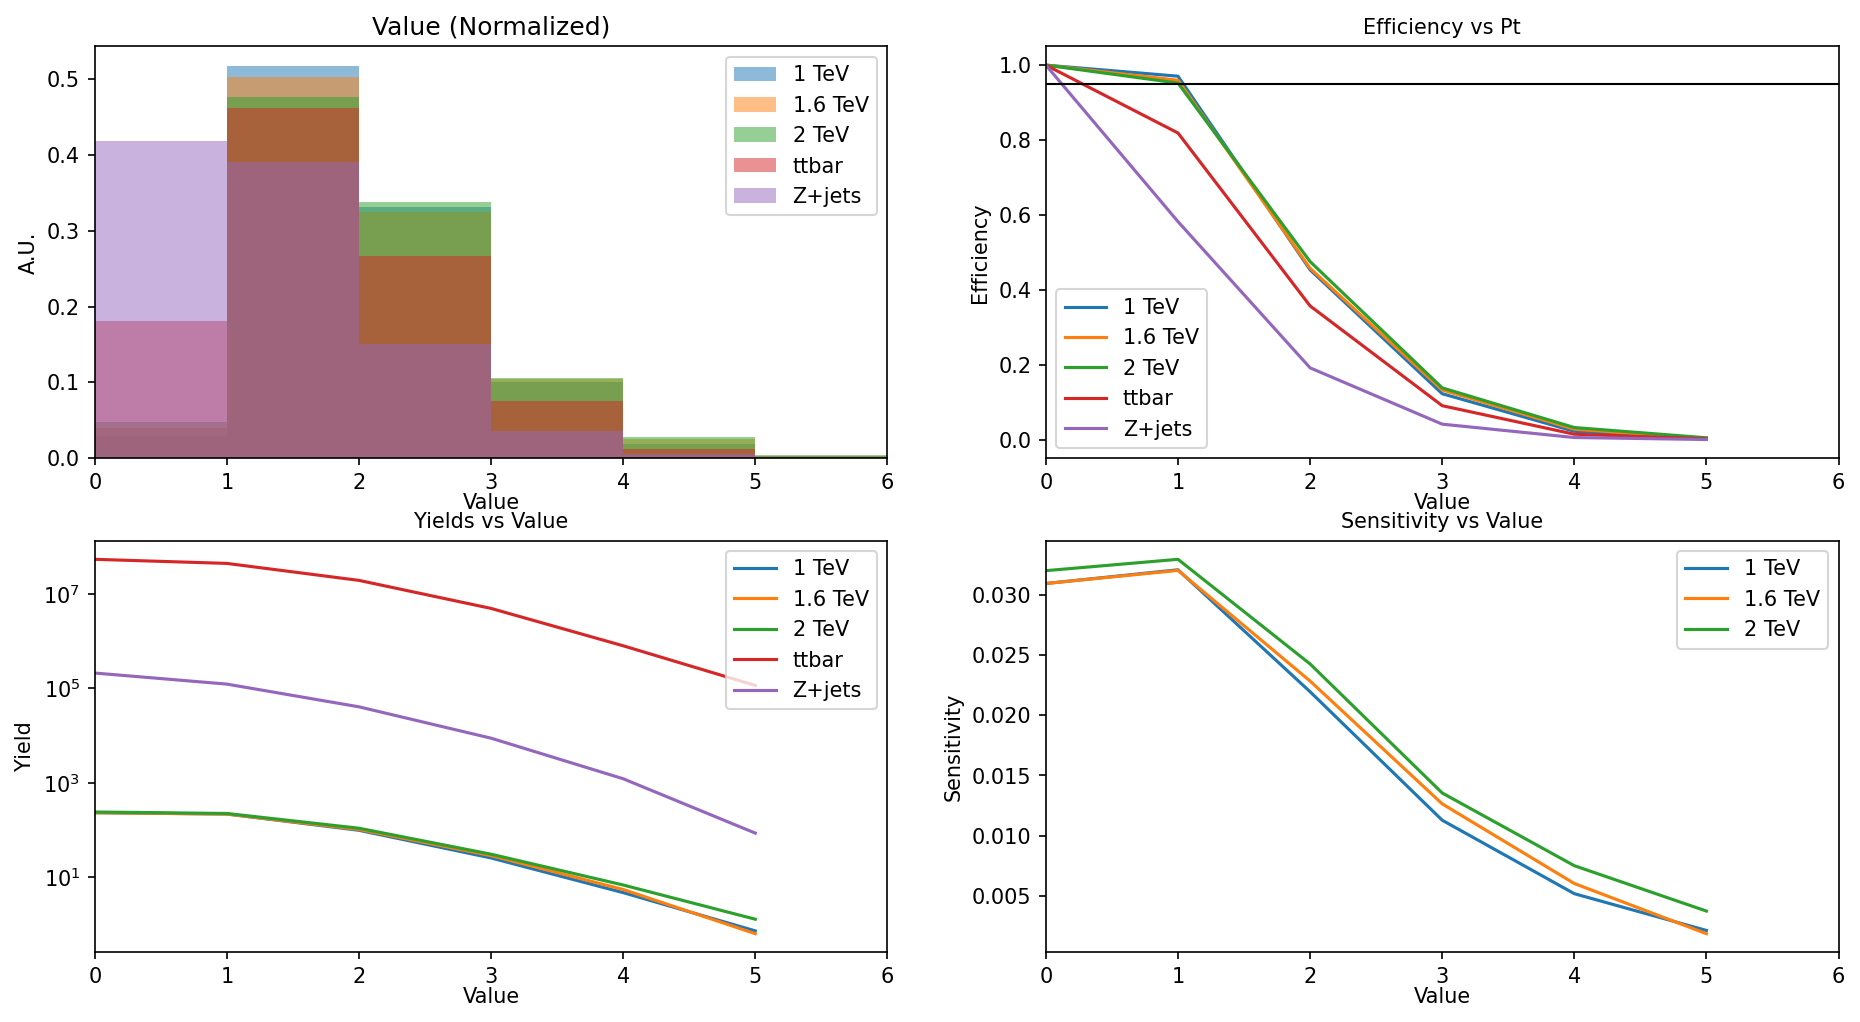

In [53]:
eff_sens_plots(all_samples, 'NIDLepton', 0, 6, 6, 'All')

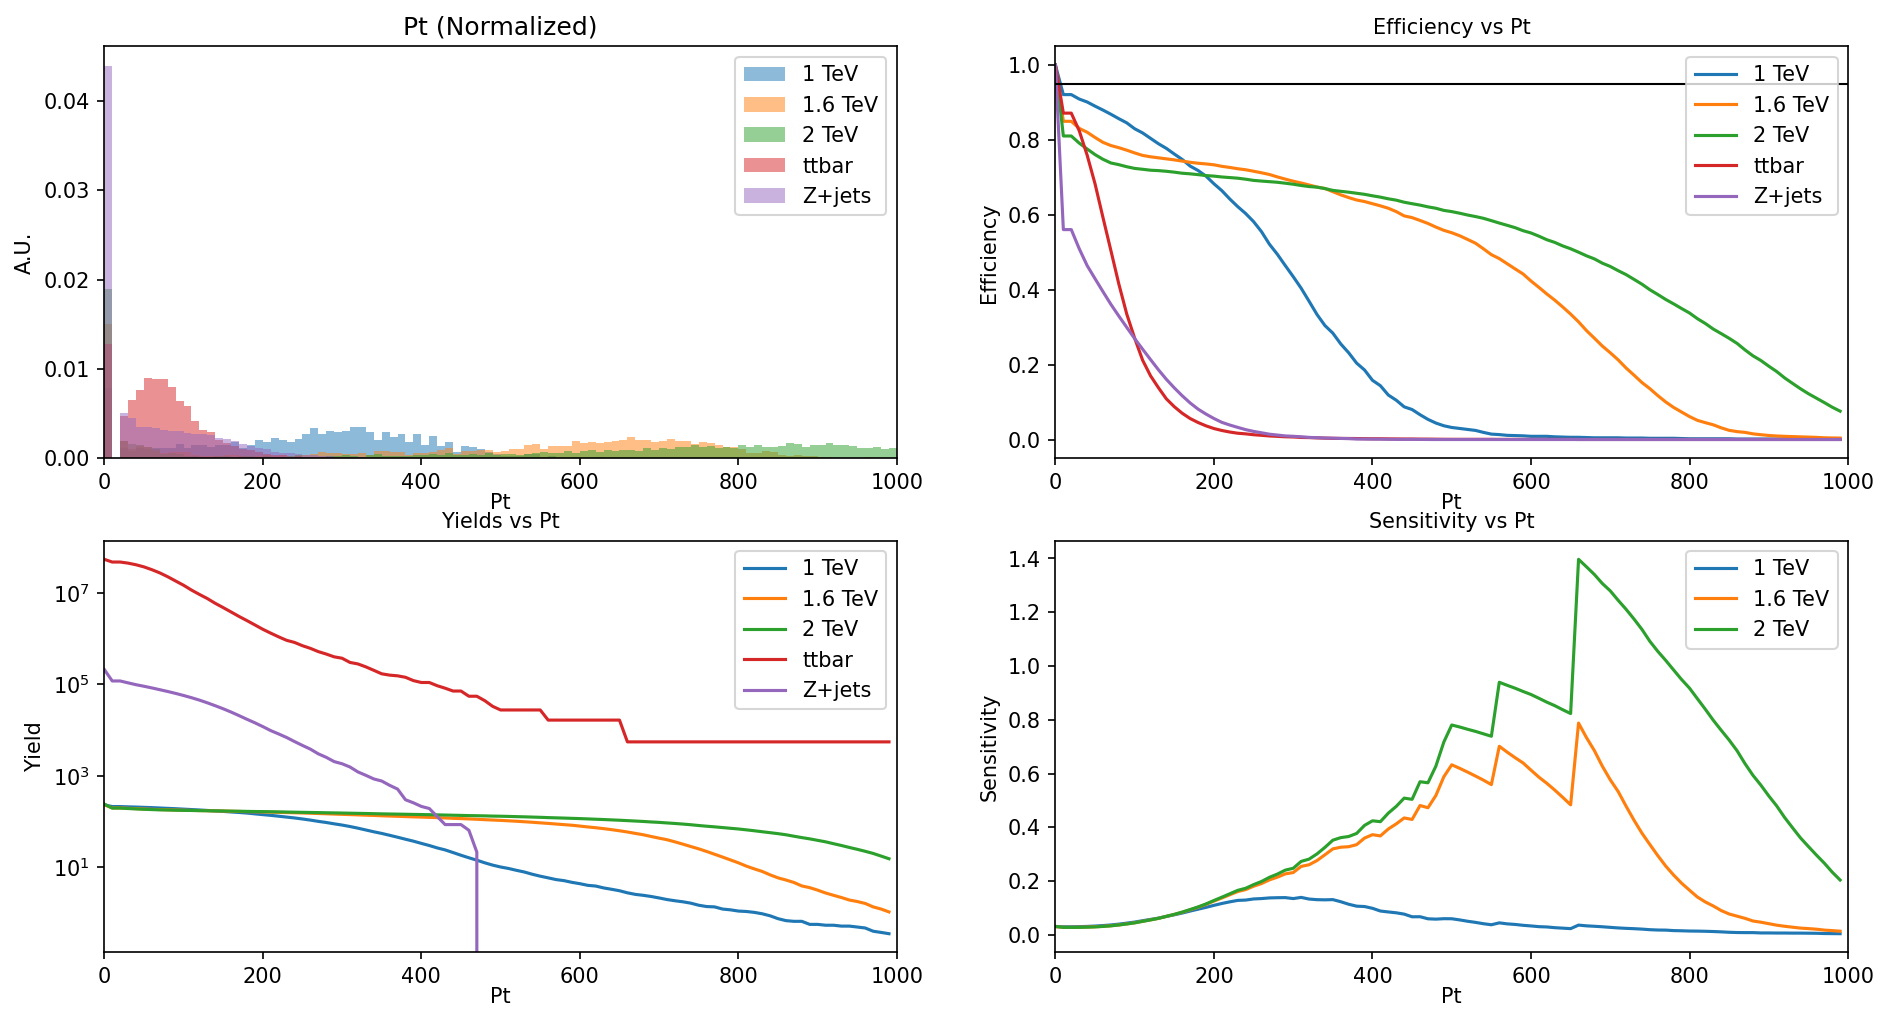

In [54]:
eff_sens_plots(all_samples, 'LeadingBTagJetPt', 0, 1000, 100, 'All')

# Preselection

In [4]:
preselection = Selection()
preselection.set_cut('NIDLepton', 1, 'min')
preselection.set_cut('LeadingLargeRJetPt', 350, 'min')

In [22]:
print('Efficiencies (fiducial)')
for sample in signal_samples:
    name = sample.short_name
    branches = sample.fid_branches
    nevents_pass = preselection.nevents_passing_cuts(branches)
    nevents = len(branches)
    eff = nevents_pass / nevents
    print(f'{name+":":<15} {eff*100:.2f}%')
print()   
print('Efficiencies')
for sample in all_samples:
    name = sample.short_name
    branches = sample.branches
    nevents_pass = preselection.nevents_passing_cuts(branches)
    nevents = len(branches)
    eff = nevents_pass / nevents
    print(f'{name+":":<15} {eff*100:.2f}%')
print() 
print('Events')
for sample in all_samples:
    name = sample.short_name
    branches = sample.branches
    nevents_pass = preselection.nevents_passing_cuts(branches)
    print(f'{name+":":<15} {nevents_pass}')
print()
print('Sensitivity')
nwevents_background = 0
for sample in background_samples:
    branches = sample.branches
    nevents = preselection.nevents_passing_cuts(branches)
    nwevents = nevents * sample.mc_weight
    nwevents_background += nwevents
for sample in signal_samples:
    name = sample.short_name
    branches = sample.branches
    nevents_pass = preselection.nevents_passing_cuts(branches)
    nwevents_pass = nevents_pass * sample.mc_weight
    sens = nwevents_pass / math.sqrt(nwevents_background)
    print(f'{name+":":<15} {sens}')

Efficiencies (fiducial)
1 TeV:          91.99%
1.6 TeV:        95.64%
2 TeV:          94.76%

Efficiencies
1 TeV:          67.66%
1.6 TeV:        86.58%
2 TeV:          88.62%
ttbar:          3.74%
Z+jets:         3.42%

Events
1 TeV:          6766
1.6 TeV:        8658
2 TeV:          8862
ttbar:          374
Z+jets:         342

Sensitivity
1 TeV:          0.10838112544100467
1.6 TeV:        0.1386881147011851
2 TeV:          0.14685899230322114


## N-1 Plots

/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: invalid value encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)


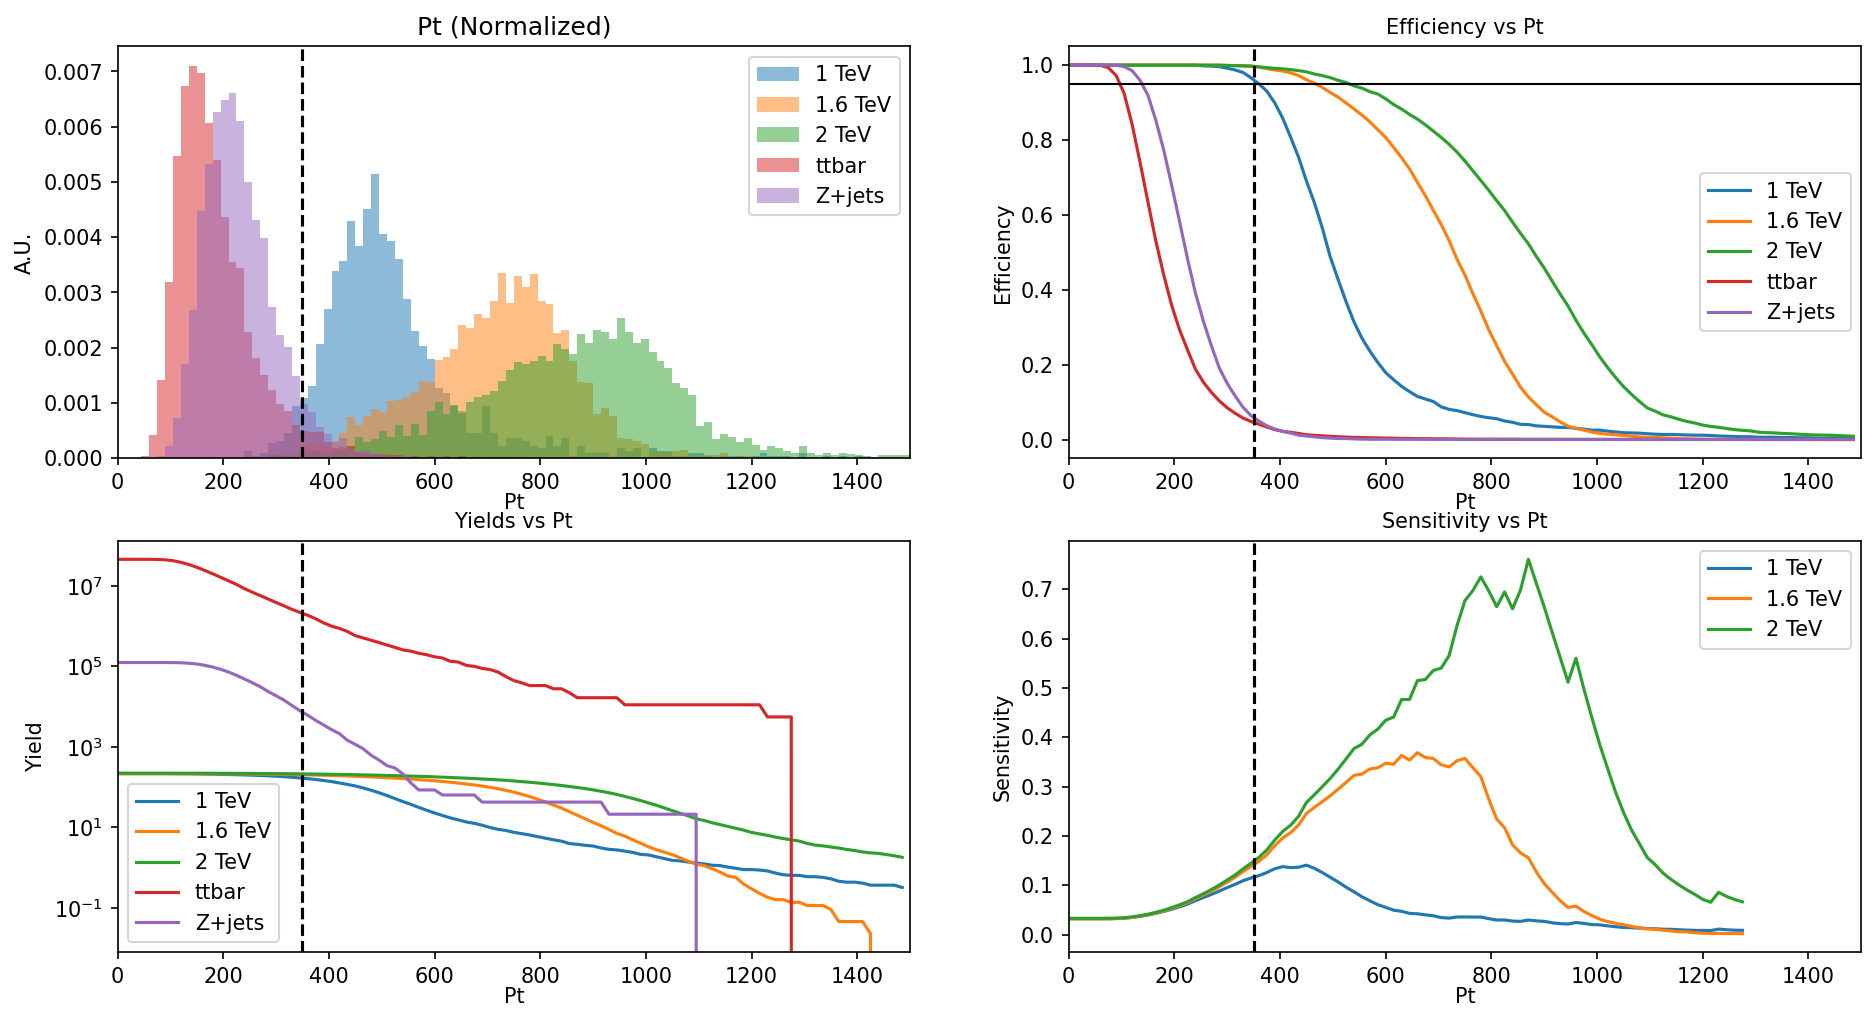

In [7]:
eff_sens_plots(all_samples, 'LeadingLargeRJetPt', 0, 1500, 100, 'All', preselection)

/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: invalid value encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: invalid value encountered in double_scalars
  sen = passed_weighted_events / math.sqrt(weighted_background_events)
/eos/home-n/nicholas/SWAN_projects/DiTauReco/scripts/bbtautau_helpers.py:661: RuntimeWarning: divide by zero encountered in double_scalars
  sen = passed_weighted

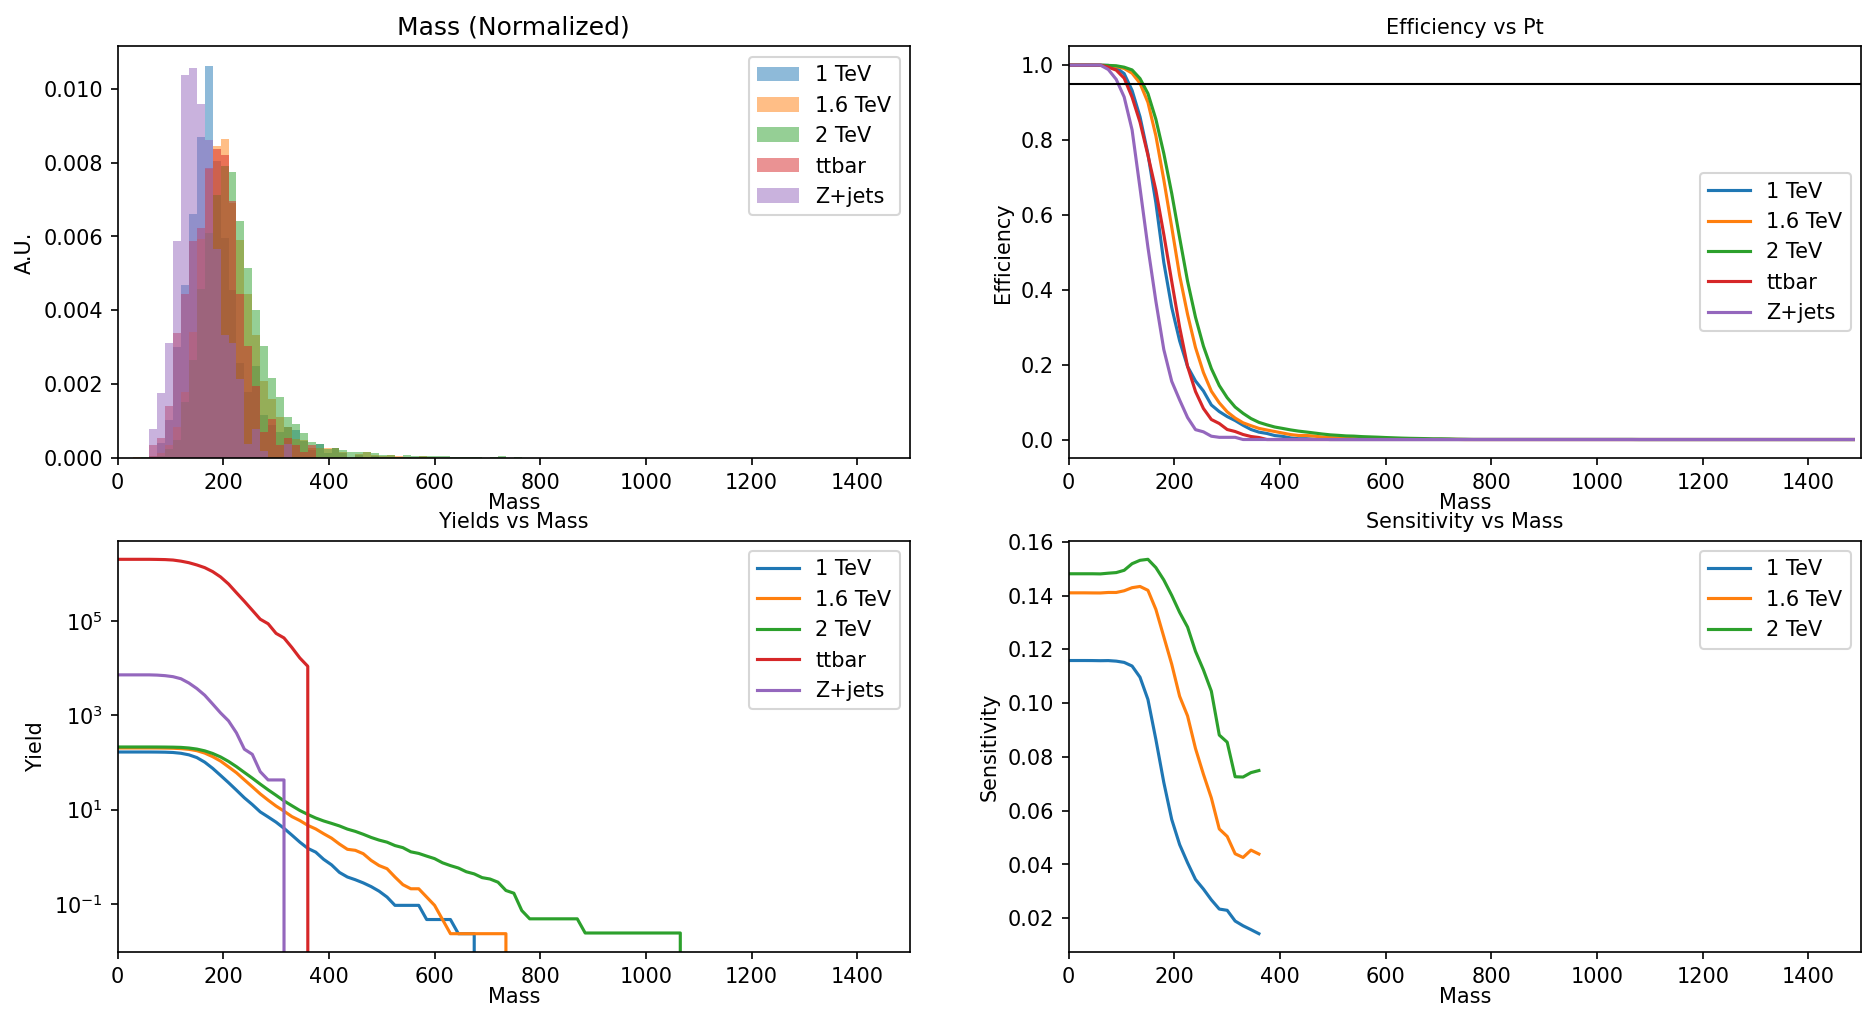

In [8]:
eff_sens_plots(all_samples, 'LeadingLargeRJetM', 0, 1500, 100, 'All', preselection)

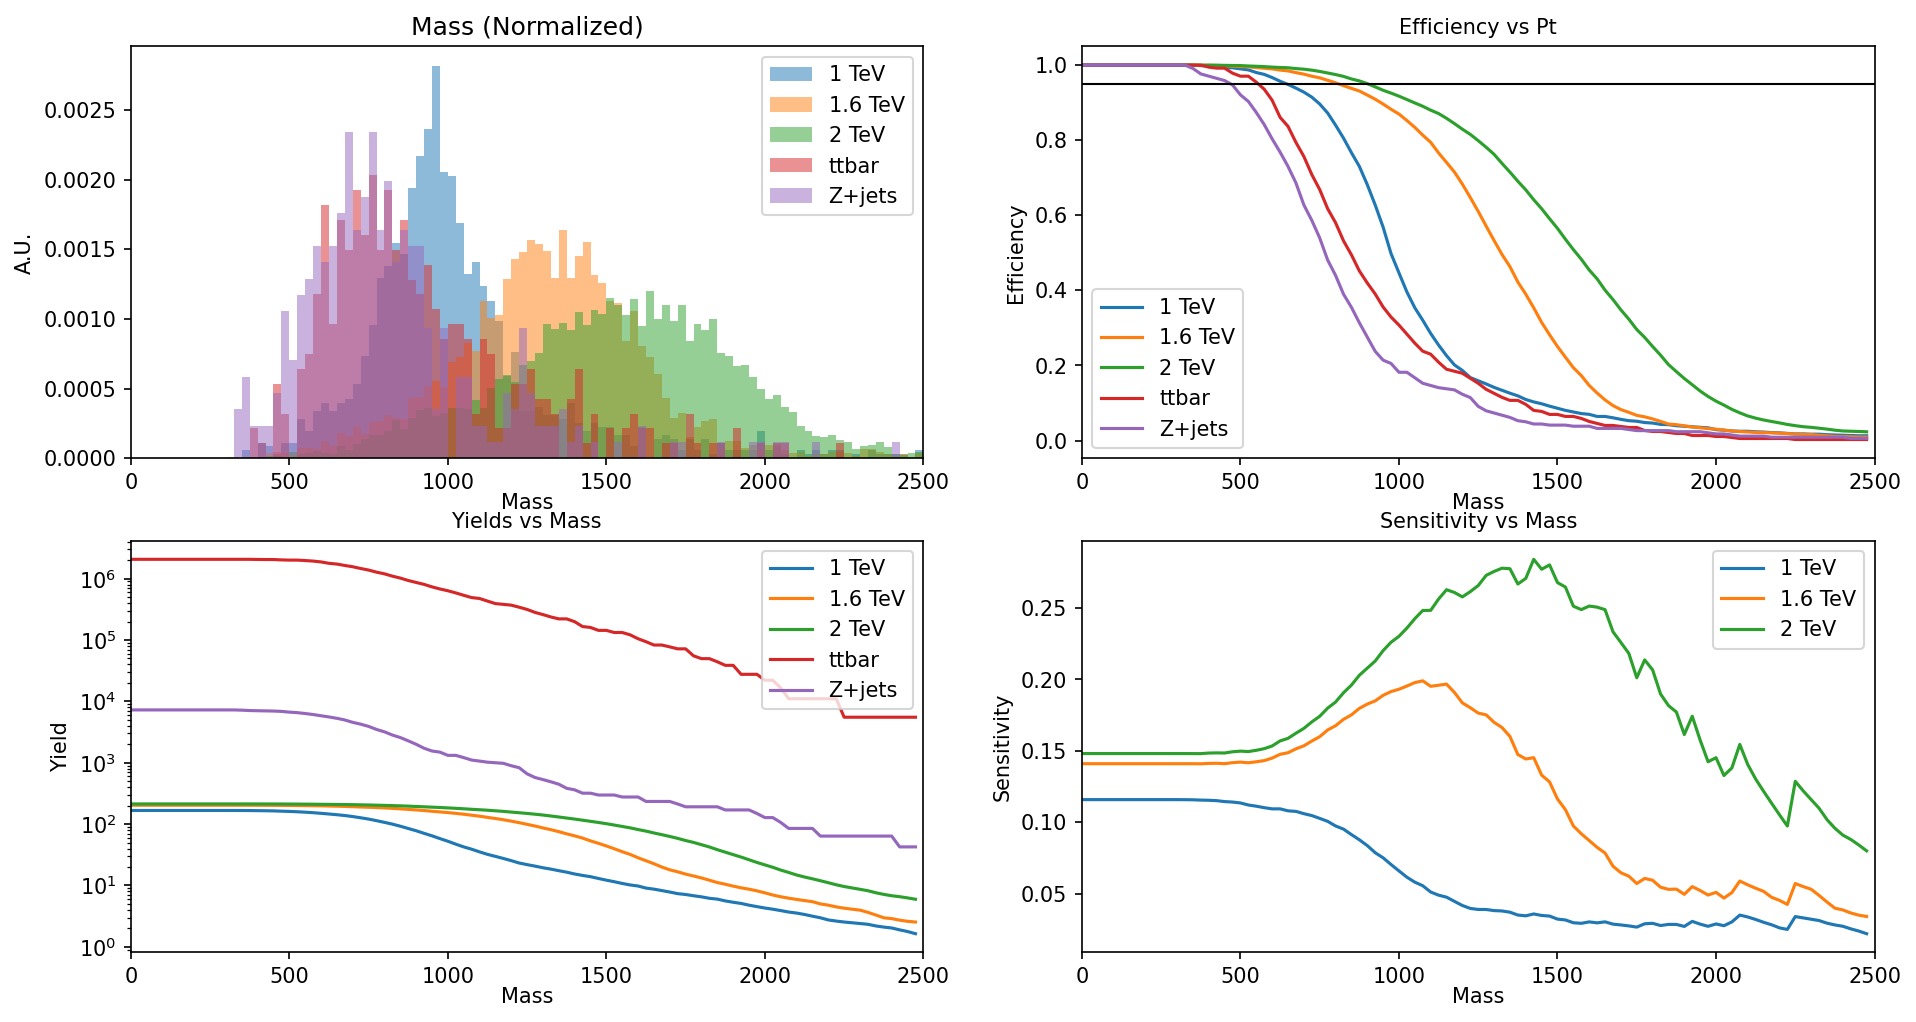

In [9]:
eff_sens_plots(all_samples, 'LargeRXM', 0, 2500, 100, 'All', preselection)

In [31]:
h4d2_selection = higg4d2_selection()

In [43]:
branches = sig20_sample.fid_hadel_branches
print(len(branches))
print(h4d2_selection.nevents_passing_cuts(branches))
print(h4d2_selection.cuts_eff(branches))

2759
2603
0.9434577745559986


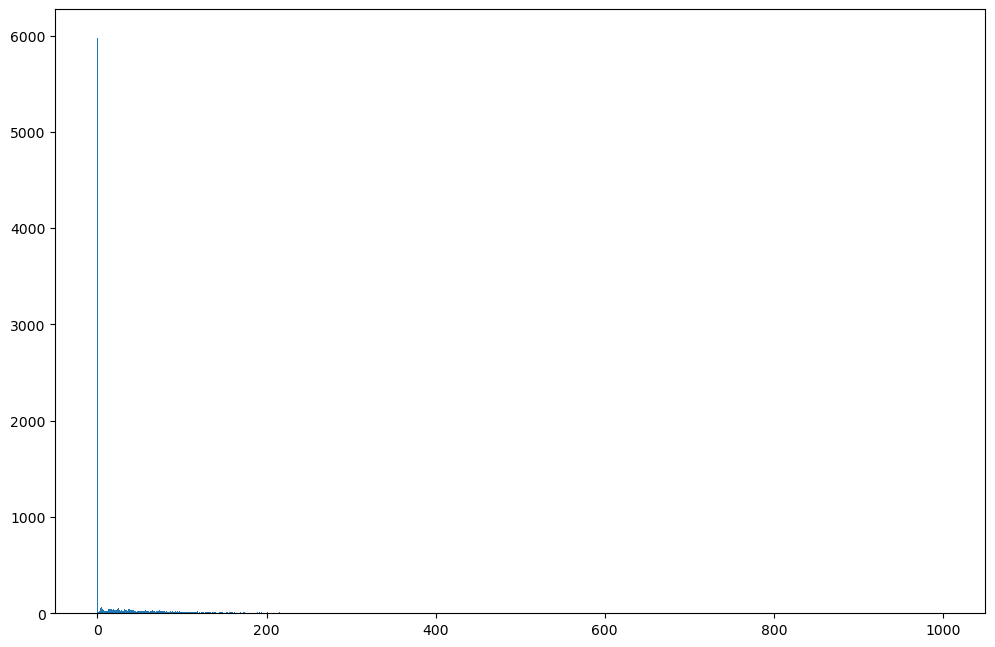

In [30]:
plt.hist(branches['LeadingEleMediumPt'], 1000, [0, 1000])
plt.show()

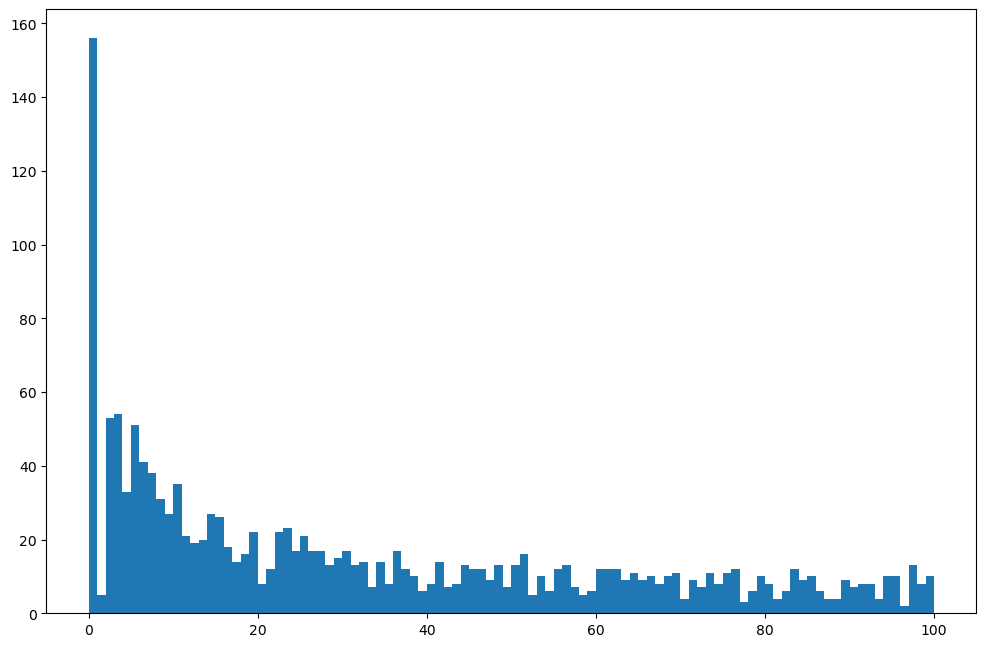

In [46]:
plt.hist(branches['LeadingMuPt'], 100, [0, 100])
plt.show()

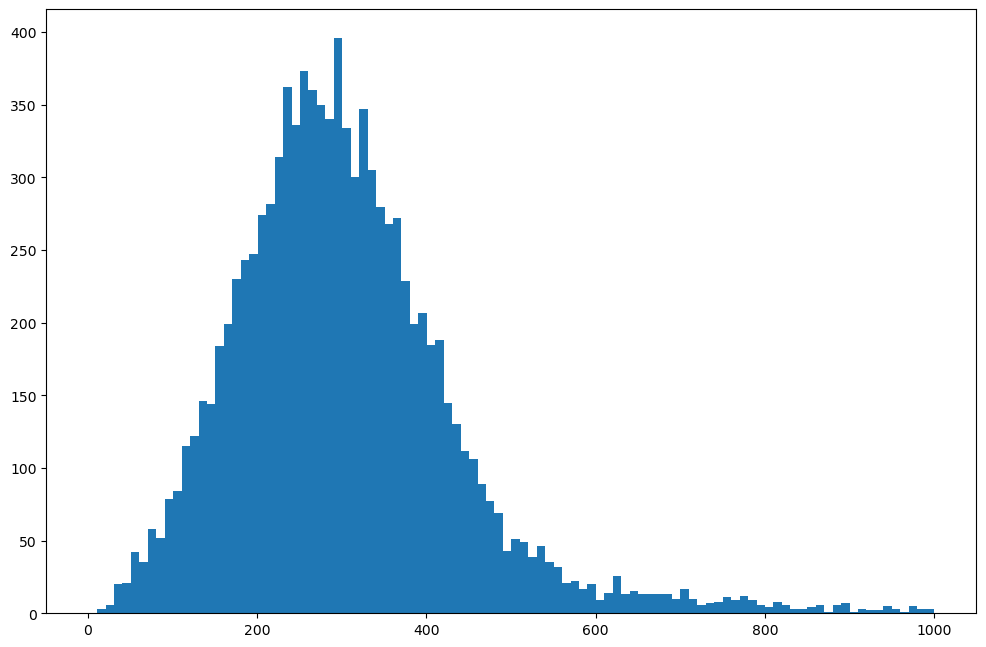

In [24]:
plt.hist(branches['LeadingTauPt'], 100, [1, 1000])
plt.show()

In [44]:
branches = sig20_sample.branches
etau_selection = Selection()

e15_cut = BranchCut('LeadingEleMediumPt', 15, 'min')
tau23_cut = BranchCut('LeadingTauPt', 23, 'min')
e15tau23_cut = CompositeCut([e15_cut, tau23_cut], 'AND')

e22_cut = BranchCut('LeadingEleMediumPt', 22, 'min')
tau18_cut = BranchCut('LeadingTauPt', 18, 'min')
e22tau18_cut = CompositeCut([e22_cut, tau18_cut], 'AND')

etau_cut = CompositeCut([e15tau23_cut, e22tau18_cut], 'OR')

etau_selection.add_cut('EleTau', etau_cut)

print('Electron + Tau')
print(f'{etau_selection.cuts_eff(branches)*100:.2f}%')
print()

mutau_selection = Selection()

mu18_cut = BranchCut('LeadingMuPt', 18, 'min')
tau18_cut = BranchCut('LeadingTauPt', 18, 'min')
mu18tau18_cut = CompositeCut([mu18_cut, tau18_cut], 'AND')

mu12_cut = BranchCut('LeadingMuPt', 12, 'min')
tau23_cut = BranchCut('LeadingTauPt', 23, 'min')
mu12tau23_cut = CompositeCut([mu12_cut, tau23_cut], 'AND')

mutau_cut = CompositeCut([mu18tau18_cut, mu12tau23_cut], 'OR')

mutau_selection.add_cut('MuTau', mutau_cut)

print('Muon + Tau')
print(f'{mutau_selection.cuts_eff(branches)*100:.2f}%')
print()

leptau_selection = Selection()

leptau_cut = CompositeCut([etau_cut, mutau_cut], 'OR')

leptau_selection.add_cut('LepTau', leptau_cut)
print('Both')
print(f'{leptau_selection.cuts_eff(branches)*100:.2f}%')

Electron + Tau
32.04%

Muon + Tau
89.45%

Both
95.60%


In [32]:
for sample in all_samples:
    print(sample.short_name)
    branches = sample.branches
    print(f'{h4d2_selection.cuts_eff(branches)*100:.2f}%')
    print()

1 TeV
95.36%

1.6 TeV
95.68%

2 TeV
95.39%

ttbar
85.55%

Z+jets
72.58%

